In [1]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
import numpy as np
import keras
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(123)

Using TensorFlow backend.


## Without dropout

In [0]:
def create_model(INPUT_DIM):
  model = Sequential()
  model.add(Dense(units=30, activation='relu', input_dim=INPUT_DIM))
  model.add(Dense(units=30, activation='relu'))
  model.add(Dense(units=2, activation='softmax'))
  return model

In [0]:
def experiments(data, labels, optimisers):
  losses, accs, means = dict(), dict(), dict()

  for optimiser in optimisers:
    model = create_model(INPUT_DIM)
    model.compile(loss='categorical_crossentropy', optimizer=optimiser, metrics=['accuracy'])
    history = model.fit(data, labels, epochs=EPOCHS, verbose=0)
    losses[optimiser], accs[optimiser] = history.history['loss'], history.history['acc']
    means[optimiser] = np.mean(model.get_weights()[0]**2)
  
  criteria = [losses, accs]
  titles = ["Error Rate", "Accuracy"]

  for criterion, title in zip(criteria, titles):
    for key, value in criterion.items():
      plt.plot(value, label=key)
    plt.legend()
    plt.title(title)
    plt.show()
    
  return [losses, accs, means]

(10, 10) (10, 2)


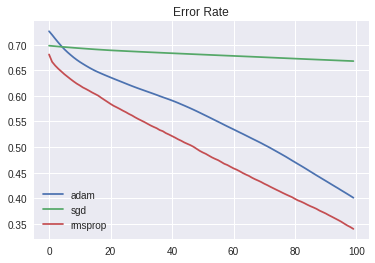

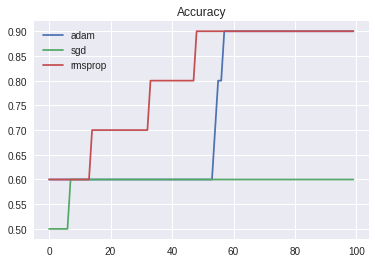

(100, 10) (100, 2)


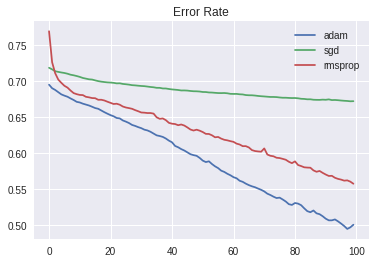

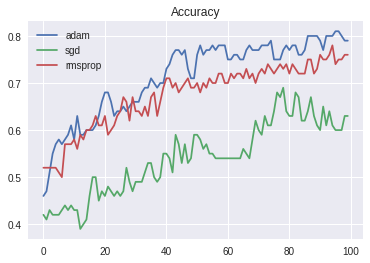

(1000, 10) (1000, 2)


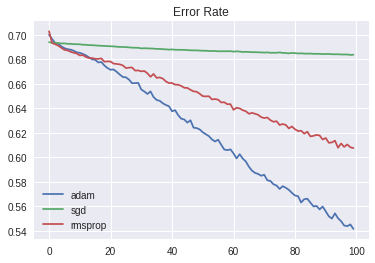

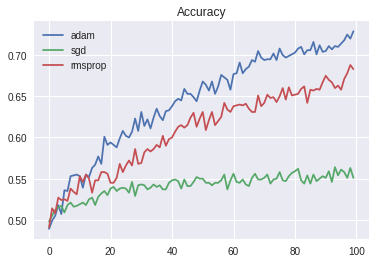

(10000, 10) (10000, 2)


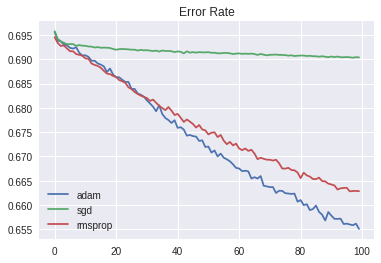

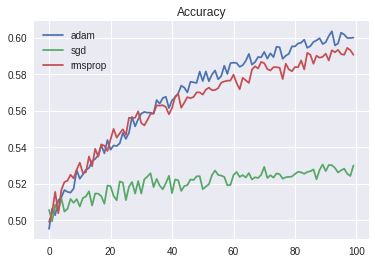

In [37]:
optimisers = ["adam", "sgd", "rmsprop"]

INPUT_DIM = 10
NUM_CLASS = 2
EPOCHS    = 100

result = list()

for num_data in [10, 100, 1000, 10000]:
  data   = np.random.rand(num_data, INPUT_DIM)
  labels = keras.utils.to_categorical(np.random.randint(NUM_CLASS, size=num_data), NUM_CLASS)
  print(data.shape, labels.shape)
  result.append(experiments(data, labels, optimisers))

In [39]:
a = [10, 100, 1000, 10000]

for i in range(4):
    print("Dataset size: ", a[i])
    print(result[i][2])

Dataset size:  10
{'adam': 0.05254625, 'sgd': 0.048615385, 'rmsprop': 0.056042004}
Dataset size:  100
{'adam': 0.057259724, 'sgd': 0.048938695, 'rmsprop': 0.05779026}
Dataset size:  1000
{'adam': 0.0928416, 'sgd': 0.040357653, 'rmsprop': 0.07178981}
Dataset size:  10000
{'adam': 0.1371469, 'sgd': 0.054381505, 'rmsprop': 0.100222886}


| Dataset |  Adam  | SGD | RMSProp
|------|------|------|------|
|  10  | 0.0525 | 0.0486 | 0.0560 |
|  100  | 0.0572 | 0.0489 | 0.0577 |
|  1000  | 0.0928 | 0.0403 | 0.0717 |
|  10000  | 0.1371 | 0.0543 | 0.1002 |

## With dropout

In [0]:
def create_model(INPUT_DIM):
  model = Sequential()
  model.add(Dense(units=30, activation='relu', input_dim=INPUT_DIM))
  model.add(Dropout(0.2))
  model.add(Dense(units=30, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(units=2, activation='softmax'))
  return model

(10, 10) (10, 2)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


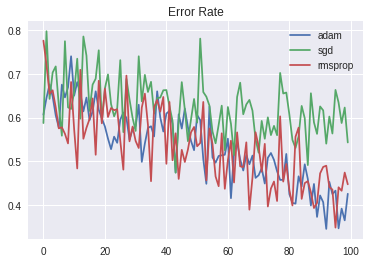

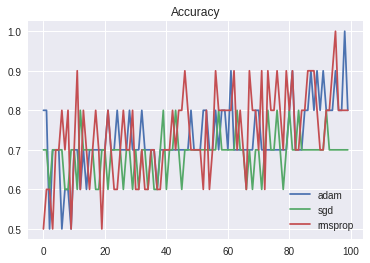

(100, 10) (100, 2)


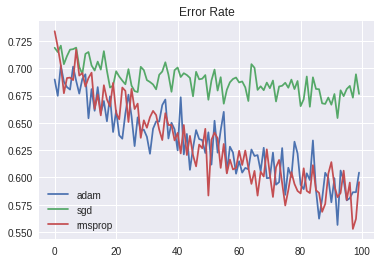

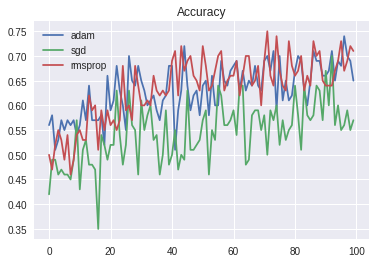

(1000, 10) (1000, 2)


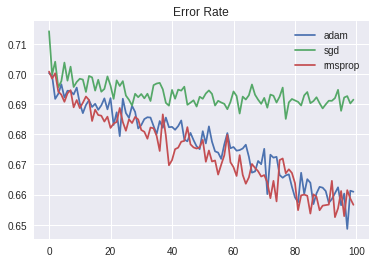

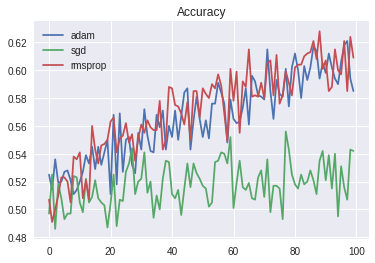

(10000, 10) (10000, 2)


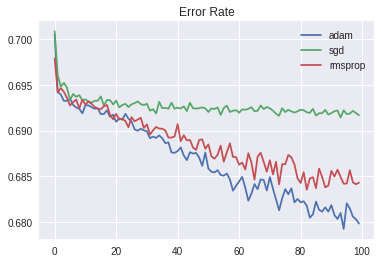

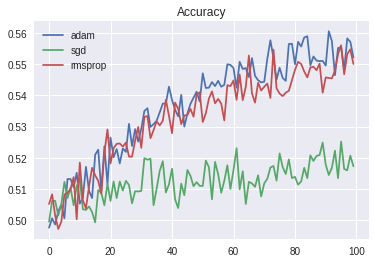

In [41]:
optimisers = ["adam", "sgd", "rmsprop"]

INPUT_DIM = 10
NUM_CLASS  = 2

result = list()

for num_data in [10, 100, 1000, 10000]:
  data   = np.random.rand(num_data, INPUT_DIM)
  labels = keras.utils.to_categorical(np.random.randint(NUM_CLASS, size=num_data), NUM_CLASS)
  print(data.shape, labels.shape)
  result.append(experiments(data, labels, optimisers))

In [43]:
a = [10, 100, 1000, 10000]

for i in range(4):
    print("Dataset size: ", a[i])
    print(result[i][2])

Dataset size:  10
{'adam': 0.054159254, 'sgd': 0.05364057, 'rmsprop': 0.05386375}
Dataset size:  100
{'adam': 0.053551007, 'sgd': 0.051284492, 'rmsprop': 0.048578687}
Dataset size:  1000
{'adam': 0.06136114, 'sgd': 0.046688505, 'rmsprop': 0.05919431}
Dataset size:  10000
{'adam': 0.10894629, 'sgd': 0.05058903, 'rmsprop': 0.07991723}


| Dataset |  Adam  | SGD | RMSProp
|------|------|------|------|
|  10  | 0.0541 | 0.0536 | 0.0538 |
|  100  | 0.0535 | 0.0512 | 0.0485 |
|  1000  | 0.0613 | 0.0466 | 0.0591 |
|  10000  | 0.1088 | 0.0505 | 0.7991 |